In [31]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [32]:
# Вариант 4
X = torch.rand(1500, 2)
Y = (torch.sum((X**2), axis=1) < 0.6).float()
Y = Y.view(-1, 1)

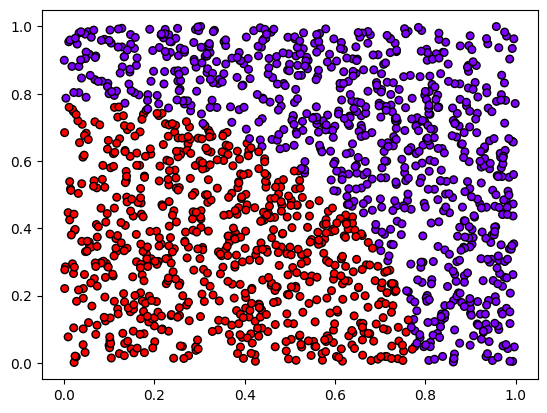

In [33]:
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c = Y.numpy()[:, 0],
            s=30, cmap='rainbow', edgecolors='black')

In [34]:
def fit(model, X,Y, batch_size=100, train=True):
      model.train(train)
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size )

      for i in range(0, numB*batch_size, batch_size):
        xb = X[i: i+batch_size]
        yb = Y[i: i+batch_size]

        y = model(xb)
        L = loss(y, yb)

        if train:
            optimizer.zero_grad()
            L.backward()
            optimizer.step()

        sumL += L.item()
        sumA += (y.round() == yb).float().mean()

      return sumL/numB,  sumA/numB

In [35]:
nX, nH, nY = 2, 5, 1
model = nn.Sequential(
          nn.Linear(nX, nH),
          nn.Sigmoid(),
          nn.Linear(nH, nY),
          nn.Sigmoid() )

In [36]:
loss      = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.5, momentum=0.8)

In [37]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y, train=False) )

epochs = 1000
for epoch in range(epochs):
    L,A = fit(model, X, Y)

    if epoch % 100 == 0 or epoch == epochs-1:
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' )

before:      loss: 0.6915 accuracy: 0.6347
epoch:     0 loss: 0.6868 accuracy: 0.5373
epoch:   100 loss: 0.0743 accuracy: 0.9880
epoch:   200 loss: 0.0392 accuracy: 0.9887
epoch:   300 loss: 0.0329 accuracy: 0.9887
epoch:   400 loss: 0.0299 accuracy: 0.9913
epoch:   500 loss: 0.0277 accuracy: 0.9920
epoch:   600 loss: 0.0258 accuracy: 0.9920
epoch:   700 loss: 0.0241 accuracy: 0.9913
epoch:   800 loss: 0.0227 accuracy: 0.9913
epoch:   900 loss: 0.0214 accuracy: 0.9920
epoch:   999 loss: 0.0202 accuracy: 0.9920


In [39]:
loss, accuracy = fit(model, X[:300], Y[:300], 25, False)

In [41]:
print(loss, float(accuracy))

0.02545216271391837 0.9933333396911621
